# Restaurant Reviews

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
df = pd.read_csv("Dataset .csv")
df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,...,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",...,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,...,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [3]:
df.columns 

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [4]:
df['Rating text']

0       Excellent
1       Excellent
2       Very Good
3       Excellent
4       Excellent
          ...    
9546    Very Good
9547    Very Good
9548         Good
9549    Very Good
9550    Very Good
Name: Rating text, Length: 9551, dtype: object

In [5]:
df['Rating text'].value_counts()

Rating text
Average      3737
Not rated    2148
Good         2100
Very Good    1079
Excellent     301
Poor          186
Name: count, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

## Analyze the text reviews to identify the most common positive and negative keywords

In [7]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [25]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.metrics import classification_report
import string

# Simplified ratings to binary sentiment (positive/negative)
df['Sentiment'] = df['Aggregate rating'].apply(lambda x: 'positive' if x > 3 else 'negative')

# Preprocessed text: lowercasing, removing punctuation and stopwords
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    return ' '.join(word for word in text.split() if word not in ENGLISH_STOP_WORDS)

df['Processed Review'] = df['Rating text'].apply(preprocess_text)

# Splited the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Processed Review'], df['Sentiment'], test_size=0.2, random_state=42)

# Trained a simple classifier
model = make_pipeline(CountVectorizer(), MultinomialNB())
model.fit(X_train, y_train)

# Predicted on the test set
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    negative       1.00      0.57      0.73       788
    positive       0.77      1.00      0.87      1123

    accuracy                           0.82      1911
   macro avg       0.88      0.79      0.80      1911
weighted avg       0.86      0.82      0.81      1911



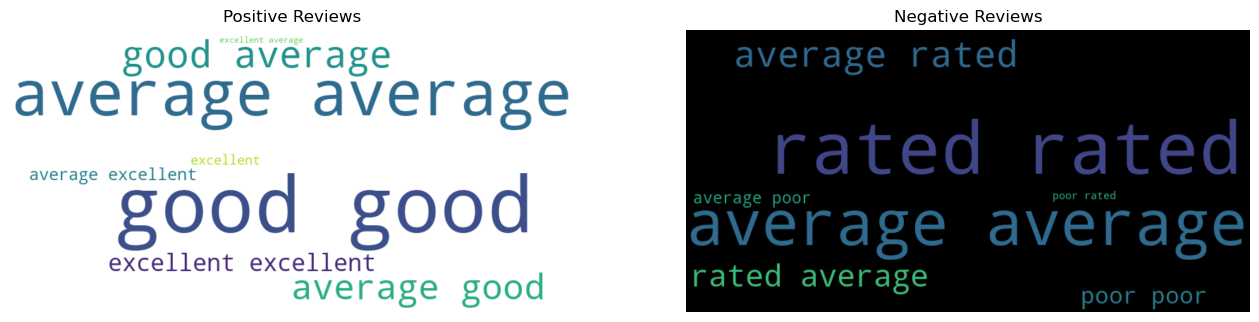

In [26]:
# Extracted positive and negative reviews
positive_reviews = df[df['Sentiment'] == 'positive']['Processed Review']
negative_reviews = df[df['Sentiment'] == 'negative']['Processed Review']

# Generated word clouds for positive and negative reviews
positive_text = ' '.join(positive_reviews)
negative_text = ' '.join(negative_reviews)

positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
negative_wordcloud = WordCloud(width=800, height=400, background_color='black').generate(negative_text)

# Displayed the word clouds
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews')

plt.subplot(1, 2, 2)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews')

plt.show()


In [27]:
# Counted and displayed the most common positive and negative words
vectorizer = CountVectorizer(stop_words='english')
positive_counts = vectorizer.fit_transform(positive_reviews)
negative_counts = vectorizer.fit_transform(negative_reviews)

positive_keywords = pd.DataFrame(positive_counts.toarray(), columns=vectorizer.get_feature_names_out()).sum().sort_values(ascending=False).head(10)
negative_keywords = pd.DataFrame(negative_counts.toarray(), columns=vectorizer.get_feature_names_out()).sum().sort_values(ascending=False).head(10)

print("Most common positive keywords:")
print(positive_keywords)

print("Most common negative keywords:")
print(negative_keywords)


Most common positive keywords:
rated      3179
average    2022
poor        301
dtype: int64
Most common negative keywords:
rated      2148
average    1715
poor        186
dtype: int64


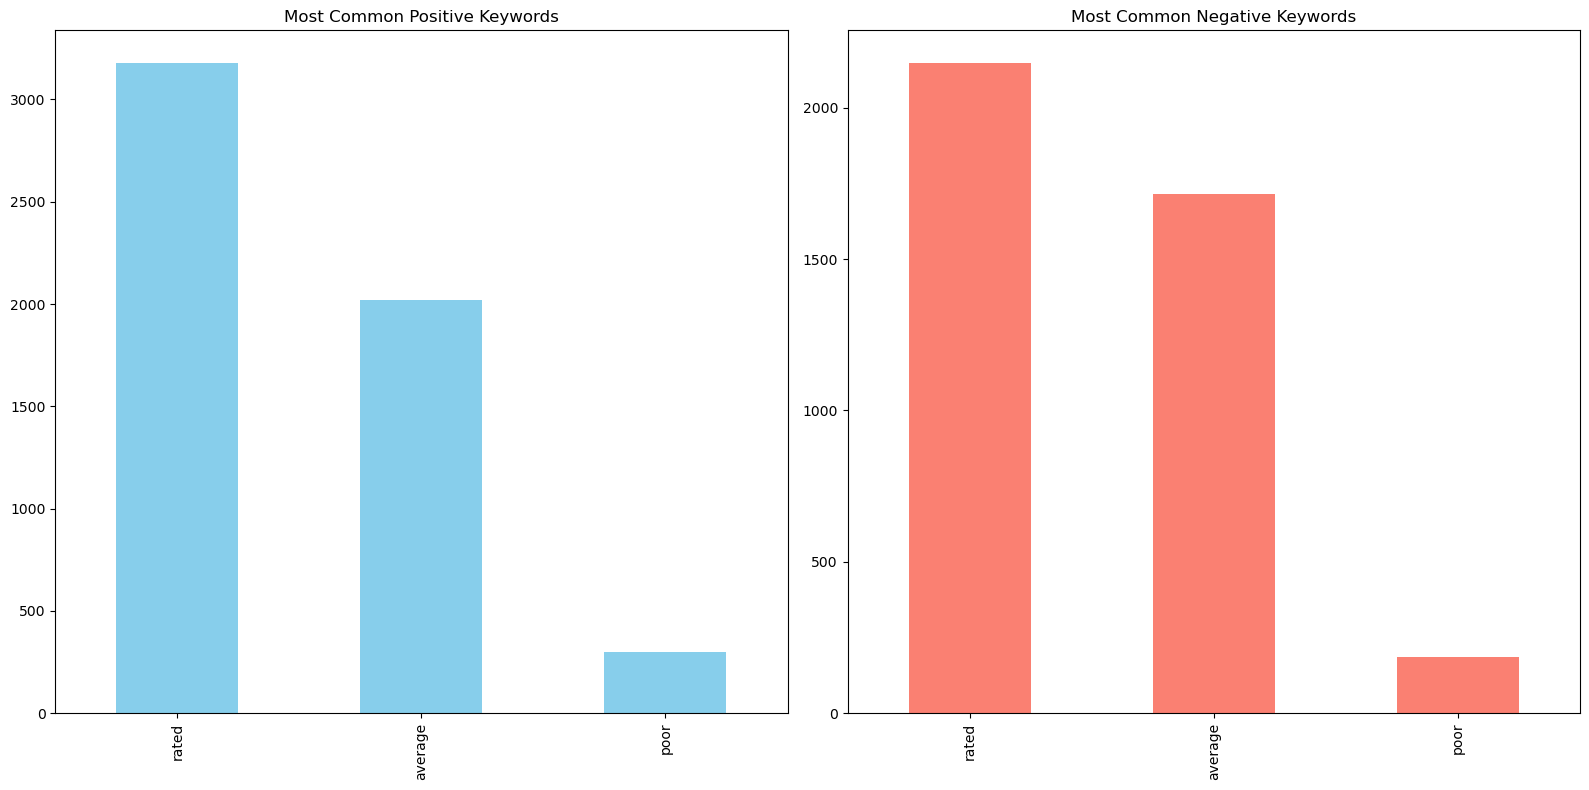

In [15]:
# Visualized the most common keywords
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
plt.xticks(rotation=45)

positive_keywords.plot(kind='bar', ax=axes[0], color='skyblue', title='Most Common Positive Keywords')

negative_keywords.plot(kind='bar', ax=axes[1], color='salmon', title='Most Common Negative Keywords')

plt.tight_layout()
plt.show()

## Calculate the average length of reviews andexplore if there is a relationship between review length and rating

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Calculated the length of each review
df['Review Length'] = df['Rating text'].apply(lambda x: len(x.split()))

# Calculated the average length of reviews
average_review_length = df['Review Length'].mean()
print(f"The average length of reviews is {average_review_length:.2f} words.")

The average length of reviews is 1.34 words.


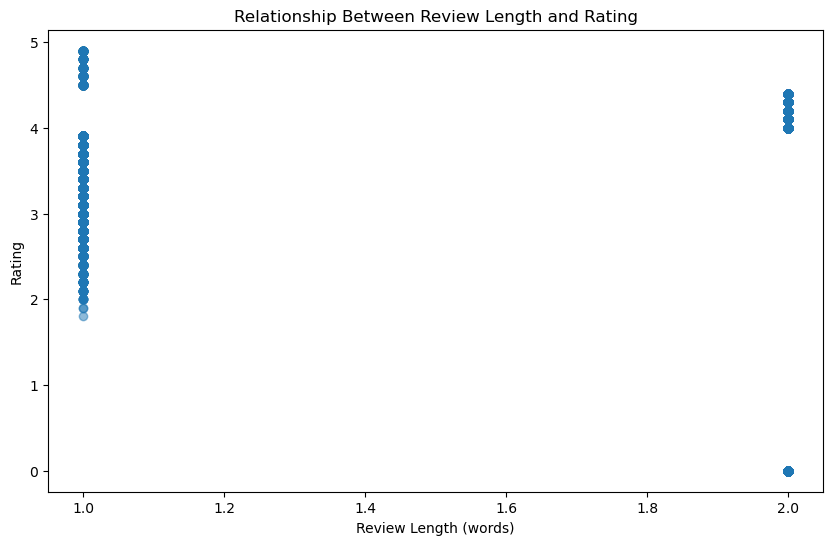

In [22]:
# Explored the relationship between review length and rating
plt.figure(figsize=(10, 6))
plt.scatter(df['Review Length'], df['Aggregate rating'], alpha=0.5)
plt.title('Relationship Between Review Length and Rating')
plt.xlabel('Review Length (words)')
plt.ylabel('Rating')
plt.show()

In [23]:
# Calculated the correlation between review length and rating
correlation, p_value = pearsonr(df['Review Length'], df['Aggregate rating'])
print(f"The Pearson correlation coefficient between review length and rating is {correlation:.2f} (p-value: {p_value:.2e})")


The Pearson correlation coefficient between review length and rating is -0.60 (p-value: 0.00e+00)
